in this part, exploratory data analysis (EDA) will be applied on fraud detection dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-deep') 
# other tyle: ggplot, Solarize_Light2

# Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('./data/applications data.csv',sep=',')

print("DATASET OVERVIEW")
print("-" * 40)
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
print(f"\nColumn names: {df.columns.tolist()}")
print("\nDataset info:\n")
display(df.info())

DATASET OVERVIEW
----------------------------------------
Dataset shape: (1000000, 10)
Memory usage: 76.29 MB

Column names: ['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5', 'dob', 'homephone', 'fraud_label']

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   record       1000000 non-null  int64 
 1   date         1000000 non-null  int64 
 2   ssn          1000000 non-null  int64 
 3   firstname    1000000 non-null  object
 4   lastname     1000000 non-null  object
 5   address      1000000 non-null  object
 6   zip5         1000000 non-null  int64 
 7   dob          1000000 non-null  int64 
 8   homephone    1000000 non-null  int64 
 9   fraud_label  1000000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 76.3+ MB


None

In [3]:
# Check for Personally Identifiable Information (PII) data and create anonymized version if needed
pii_columns = ['ssn', 'firstname', 'lastname', 'address', 'dob', 'homephone']
print(f"PII columns: {pii_columns}")
print("Random sample records of the dataset excluding the pii columns for privacy protection:")
display(df[[c for c in df.columns.to_list() if c not in pii_columns]].sample(3))

PII columns: ['ssn', 'firstname', 'lastname', 'address', 'dob', 'homephone']
Random sample records of the dataset excluding the pii columns for privacy protection:


,record,date,zip5,fraud_label
840946,840947,20161103,92944,0
709115,709116,20160916,86483,0
93093,93094,20160203,55691,0


the record column is just the index + 1, just delete it

In [4]:
sum((df.record - 1 - df.index) == 0) == len(df)

True

In [5]:
if 'record' in df.columns:
    df.drop('record', axis=1, inplace=True)
    print('record column has been removed')   
else:
    print('no record column in dataset found')

record column has been removed


In [6]:
print("STATISTICAL SUMMARY")
print("-" * 40)

# Basic statistics for numerical features
print("\nFeatures summary:")
display(df.describe().round(3))

# Separate statistics by class
print("\n\nStatistics for NORMAL transactions:")
display(df[df['fraud_label'] == 0].describe().round(3).iloc[:, :])

print("\n\nStatistics for FRAUD transactions:")
display(df[df['fraud_label'] == 1].describe().round(3).iloc[:, :])

STATISTICAL SUMMARY
----------------------------------------

Features summary:


,date,ssn,zip5,dob,homephone,fraud_label
count,1.000000e+06,1.000000e+06,1000000.000,1.000000e+06,1.000000e+06,1000000.000
mean,2.016067e+07,5.083415e+08,50073.333,1.951725e+07,5.368716e+09,0.014
std,3.449870e+02,2.934864e+08,28915.922,3.568872e+05,3.082161e+09,0.119
min,2.016010e+07,3.600000e+01,2.000,1.900010e+07,5.937990e+05,0.000
25%,2.016040e+07,2.542176e+08,24992.000,1.916092e+07,2.677134e+09,0.000
50%,2.016070e+07,5.088144e+08,50492.000,1.950090e+07,5.399910e+09,0.000
75%,2.016100e+07,7.630924e+08,74496.000,1.983032e+07,8.109241e+09,0.000
max,2.016123e+07,1.000000e+09,99999.000,2.016103e+07,1.000000e+10,1.000




Statistics for NORMAL transactions:


,date,ssn,zip5,dob,homephone,fraud_label
count,9.856070e+05,9.856070e+05,985607.000,9.856070e+05,9.856070e+05,985607.0
mean,2.016067e+07,5.084230e+08,50071.781,1.951681e+07,5.373264e+09,0.0
std,3.450400e+02,2.935587e+08,28918.302,3.570706e+05,3.083631e+09,0.0
min,2.016010e+07,3.600000e+01,2.000,1.900010e+07,5.937990e+05,0.0
25%,2.016040e+07,2.542316e+08,24992.000,1.916081e+07,2.678992e+09,0.0
50%,2.016070e+07,5.089809e+08,50477.000,1.950081e+07,5.411971e+09,0.0
75%,2.016100e+07,7.631507e+08,74496.000,1.983031e+07,8.121694e+09,0.0
max,2.016123e+07,1.000000e+09,99999.000,2.016103e+07,1.000000e+10,0.0




Statistics for FRAUD transactions:


,date,ssn,zip5,dob,homephone,fraud_label
count,1.439300e+04,1.439300e+04,14393.000,1.439300e+04,1.439300e+04,14393.0
mean,2.016068e+07,5.027624e+08,50179.636,1.954706e+07,5.057239e+09,1.0
std,3.412080e+02,2.884446e+08,28753.246,3.427932e+05,2.963266e+09,0.0
min,2.016010e+07,6.522800e+04,63.000,1.900012e+07,6.353920e+05,1.0
25%,2.016041e+07,2.526104e+08,25502.000,1.924093e+07,2.513981e+09,1.0
50%,2.016071e+07,4.966773e+08,51286.000,1.953092e+07,4.961861e+09,1.0
75%,2.016100e+07,7.576879e+08,74107.000,1.984041e+07,7.604890e+09,1.0
max,2.016123e+07,1.000000e+09,99996.000,2.016103e+07,1.000000e+10,1.0


# Data Cleaning

## missing and duplicates

In [7]:
print("DATA QUALITY ASSESSMENT")
print("-" * 40)

# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print(f"Missing values per column:")
if missing_values.sum() == 0:
    print("No missing values found in the dataset! ✓")
else:
    missing_df = pd.DataFrame({
        'Column': missing_values[missing_values > 0].index,
        'Missing_Count': missing_values[missing_values > 0].values,
        'Percentage': missing_percentage[missing_values > 0].values
    })
    print(missing_df)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
if duplicates > 0:
    df.drop_duplicates(keep='first', inplace=True)
    if df.duplicated().sum() == 0:
        print('Duplicates based on all columns have been removed, only keep the first record.')
# Check for infinite values
inf_values = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"\nInfinite values: {inf_values}")

DATA QUALITY ASSESSMENT
----------------------------------------
Missing values per column:
No missing values found in the dataset! ✓

Duplicate rows: 480 (0.05%)
Duplicates based on all columns have been removed, only keep the first record.

Infinite values: 0


## data types

In [8]:
#original data types
df.dtypes

date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [9]:
# change date format
df['date'] = df['date'].apply(pd.to_datetime,format='%Y%m%d')
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
# change other features data type
df.ssn = df.ssn.astype(str)
df.zip5 = df.zip5.astype(str)
df.dob = df.dob.astype(str)
df.homephone = df.homephone.astype(str)

Date range: 2016-01-01 00:00:00 to 2016-12-31 00:00:00


In [10]:
# add leading 0 to zips
df['zip5'] = df.zip5.apply(lambda x: x if len(x) == 5 else '0'*(5-len(x)) + x)

## outliers

### date

In [11]:
# 2016 was a leap year that should had 366 days
print('number of days in the dataset: ',len(df['date'].unique()))

number of days in the dataset:  365


In [12]:
daily_count = df.assign(apps = np.ones(len(df))).groupby('date')['apps'].count()
daily_count

date
2016-01-01    2838
2016-01-02    2718
2016-01-03    2763
2016-01-04    2757
2016-01-05    2730
              ... 
2016-12-27    2717
2016-12-28    2832
2016-12-29    2765
2016-12-30    2682
2016-12-31    2810
Name: apps, Length: 365, dtype: int64

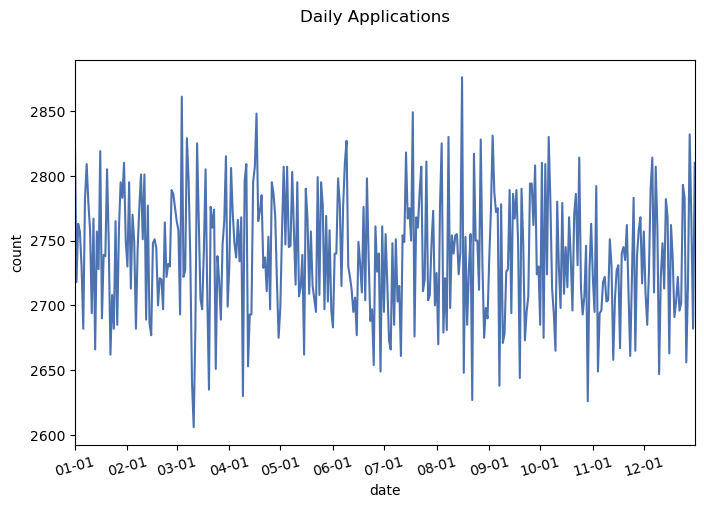

In [13]:
# using plot to find which day is lost
#by seaborn: sns.lineplot(data = daily_count)
#by pd directly: daily_count.plot(title = 'Daily Applications')
#by matplotlib
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(daily_count)
ax.set_xlabel('date',fontsize=10)
ax.set_ylabel('count',fontsize=10)
ax.tick_params(axis='x', labelrotation=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
date_format = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlim([df.date.min(), df.date.max()])
fig.suptitle('Daily Applications', fontsize=12)
plt.show()

looks normal, check weekly application then

In [14]:
# Resample to weekly (assuming daily_count is a Series with datetime index)
weekly_count = daily_count.resample('W').sum()
weekly_count

date
2016-01-03     8319
2016-01-10    19297
2016-01-17    19121
2016-01-24    19082
2016-01-31    19347
2016-02-07    19182
2016-02-14    19281
2016-02-21    19061
2016-02-28    19220
2016-03-06    16526
2016-03-13    19118
2016-03-20    19056
2016-03-27    19107
2016-04-03    19334
2016-04-10    19179
2016-04-17    19298
2016-04-24    19253
2016-05-01    19139
2016-05-08    19412
2016-05-15    19091
2016-05-22    19138
2016-05-29    19248
2016-06-05    19194
2016-06-12    19293
2016-06-19    19045
2016-06-26    19039
2016-07-03    19042
2016-07-10    18941
2016-07-17    19274
2016-07-24    19358
2016-07-31    19163
2016-08-07    19077
2016-08-14    19255
2016-08-21    19185
2016-08-28    19215
2016-09-04    19191
2016-09-11    19038
2016-09-18    19301
2016-09-25    19051
2016-10-02    19313
2016-10-09    19225
2016-10-16    19105
2016-10-23    19201
2016-10-30    19026
2016-11-06    19010
2016-11-13    18986
2016-11-20    19050
2016-11-27    19039
2016-12-04    19120
2016-12-11    1

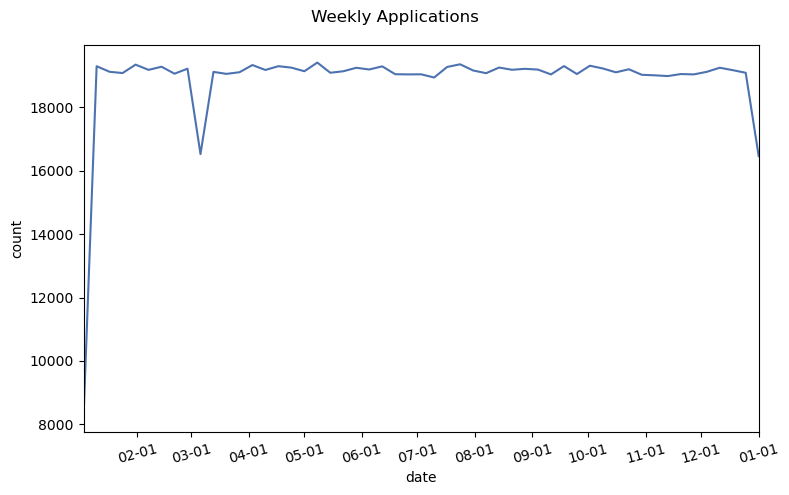

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(weekly_count)

ax.set_xlabel('date', fontsize=10)
ax.set_ylabel('count', fontsize=10)
ax.tick_params(axis='x', labelrotation=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

date_format = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)

ax.set_xlim([weekly_count.index.min(), weekly_count.index.max()])

fig.suptitle('Weekly Applications', fontsize=12)
plt.tight_layout()
plt.show()

### others

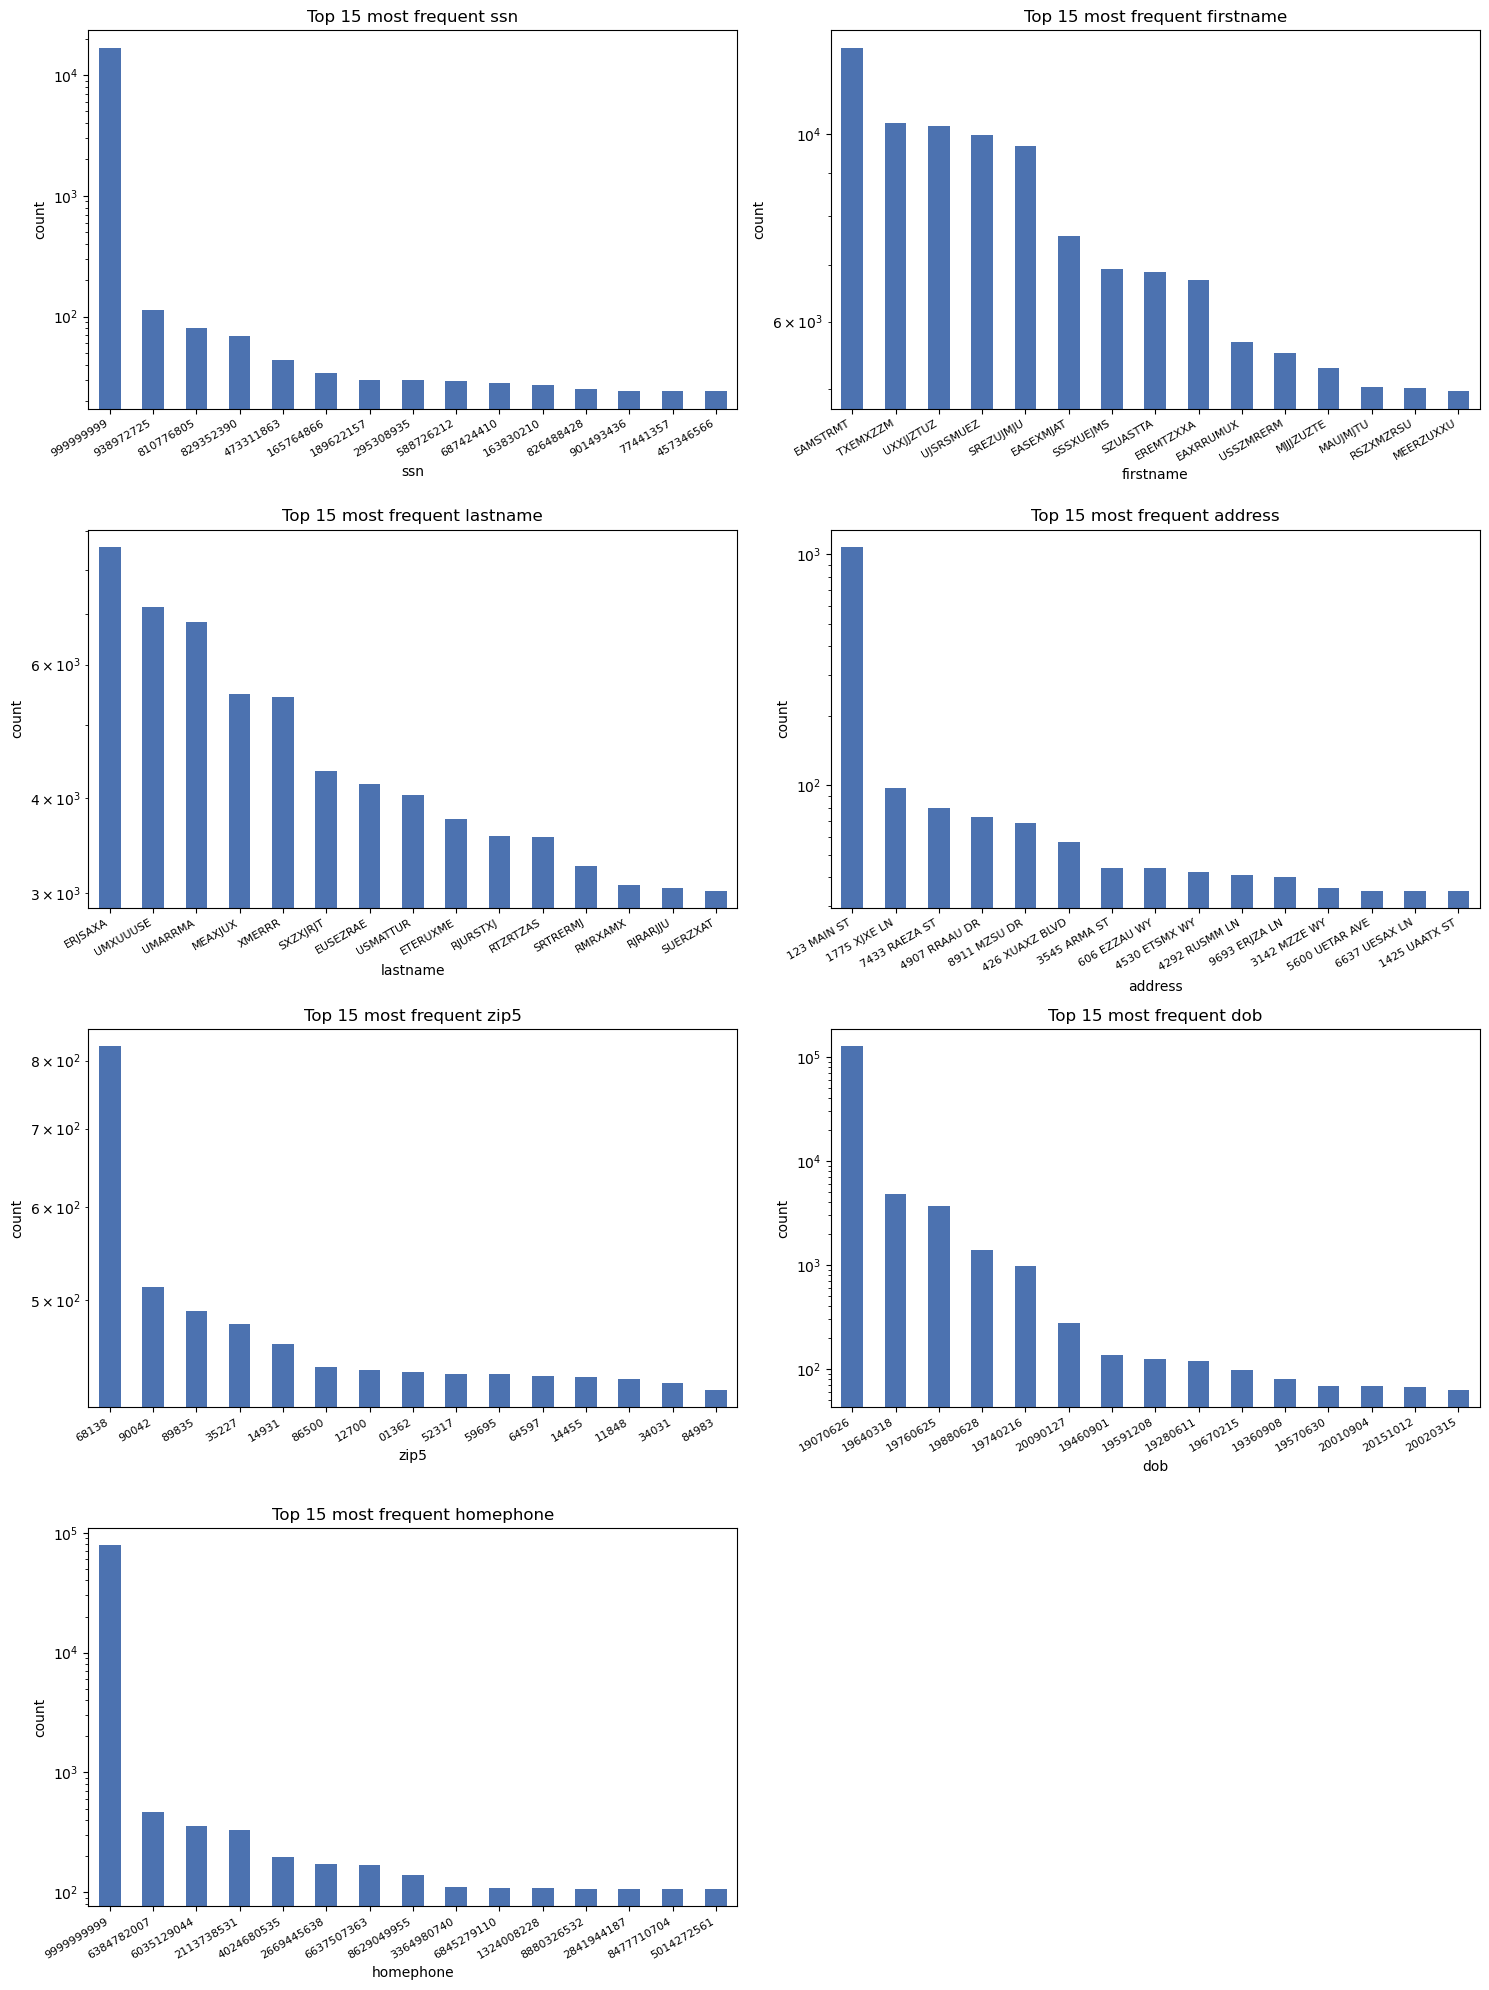

In [16]:
features_to_check = ['ssn', 'firstname', 'lastname', 'address', 'zip5', 'dob','homephone']
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
ax = ax.flatten()

for i, c in enumerate(features_to_check):
    df[c].value_counts().head(15).plot(kind='bar', ax=ax[i])
    ax[i].set_yscale('log')
    ax[i].set_xlabel(c, fontsize=10)
    ax[i].set_ylabel('count', fontsize=10)
    ax[i].set_title(f'Top 15 most frequent {c}', fontsize=12)
    ax[i].tick_params(axis='x', labelrotation=30, labelsize=8)
    
    # Set horizontal alignment to 'right'
    for label in ax[i].get_xticklabels():
        label.set_ha('right')

# Hide unused axes
for j in range(len(features_to_check), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [17]:
for c in features_to_check:
    print(f'\n{df[c].value_counts()}\n')


ssn
999999999    16930
938972725      114
810776805       81
829352390       69
473311863       44
             ...  
874092612        1
823290326        1
68098331         1
72152239         1
361232148        1
Name: count, Length: 835819, dtype: int64


firstname
EAMSTRMT     12652
TXEMXZZM     10291
UXXJJZTUZ    10230
UJSRSMUEZ     9979
SREZUJMJU     9687
             ...  
UZEARSRZ         1
XMJUTTJZU        1
RUERMAXSA        1
TUSSMZJA         1
RUZUJJRMX        1
Name: count, Length: 78136, dtype: int64


lastname
ERJSAXA     8576
UMXUUUSE    7153
UMARRMA     6832
MEAXJUX     5488
XMERRR      5445
            ... 
SXJUJUER       1
MSJXAZX        1
SUJUJTST       1
SMJUAMJR       1
RMJZURRS       1
Name: count, Length: 177001, dtype: int64


address
123 MAIN ST      1079
1775 XJXE LN       97
7433 RAEZA ST      80
4907 RRAAU DR      73
8911 MZSU DR       69
                 ... 
6828 SXZXU PL       1
2369 RTSSA RD       1
4507 SMXMR RD       1
3999 XXTSS WY       1
3408 UZZAM W

from above, there are several strange things:
1. ssn = 999999999, only 16930 records, not too much to the whole dataset, can just delete
2. 1079 records happened on the address of '123 MAIN ST', much more than the second highest count address
3. 126526 records applied by people with dob 19070626, first it's much more than the next highest, second people with this dob is too old in this dataset
4. homephone = 9999999999

In [18]:
len(df.loc[(df.ssn=='999999999') | (df.address == '123 MAIN ST') | (df.dob == 19070626) \
      |(df.homephone == 9999999999)]) / len(df)

0.01783456058908276

it is not much, just delete them

In [19]:
df = df.loc[(df.ssn!='999999999') & (df.address != '123 MAIN ST') & (df.dob != 19070626) \
      &(df.homephone != 9999999999)]
len(df)

981694

Finished Dataset Cleaning

In [20]:
df.reset_index(drop=True, inplace=True)
df.to_csv('./data/cleaned.csv')

## Analysis on Raw Data

TARGET VARIABLE DISTRIBUTION
----------------------------------------
Normal transactions: 967,411 (98.55%)
Fraudulent transactions: 14,283 (1.45%)
Imbalance ratio: 1:67
This dataset is super imbalanced


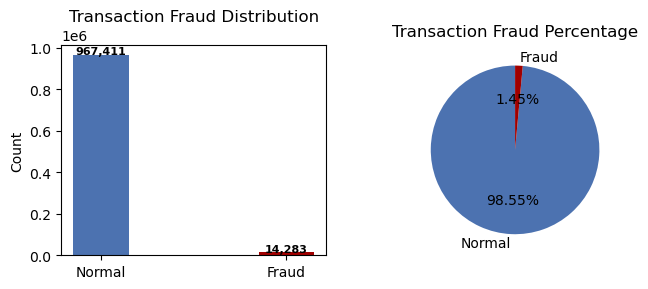

In [21]:
print("TARGET VARIABLE DISTRIBUTION")
print("-" * 40)

fraud_counts = df['fraud_label'].value_counts()
fraud_percentage = df['fraud_label'].value_counts(normalize=True) * 100

print(f"Normal transactions: {fraud_counts[0]:,} ({fraud_percentage[0]:.2f}%)")
print(f"Fraudulent transactions: {fraud_counts[1]:,} ({fraud_percentage[1]:.2f}%)")
print(f"Imbalance ratio: 1:{int(fraud_counts[0]/fraud_counts[1])}")
if abs(fraud_percentage[0] - fraud_percentage[1]) > 40:
    print("This dataset is super imbalanced")

# Visualization of class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={'width_ratios': [1, 2]})
fig.subplots_adjust(wspace=0)
#colors = ['#1DB954', '#F03A17']
#colors = ['#384860', '#a00000']
colors = ['#4C72B0', '#a00000']
# Bar plot
ax1.bar(['Normal', 'Fraud'], fraud_counts.values, color = ['#4C72B0', '#a00000'], width=0.3)
ax1.set_ylabel('Count')
ax1.set_title('Transaction Fraud Distribution')
for i, v in enumerate(fraud_counts.values):
    ax1.text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold', fontsize=8)

# Pie chart
wedges, texts, autotexts = ax2.pie(fraud_counts.values, labels=['Normal', 'Fraud'], 
                                   colors=colors, 
                                   autopct='%1.2f%%', startangle=90)
ax2.set_title('Transaction Fraud Percentage')

plt.tight_layout()
#plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight', facecolor='#191414')
plt.show()

TIME ANALYSIS
----------------------------------------
Date range: 2016-01-01 00:00:00 to 2016-12-31 00:00:00
Time span: 365 days


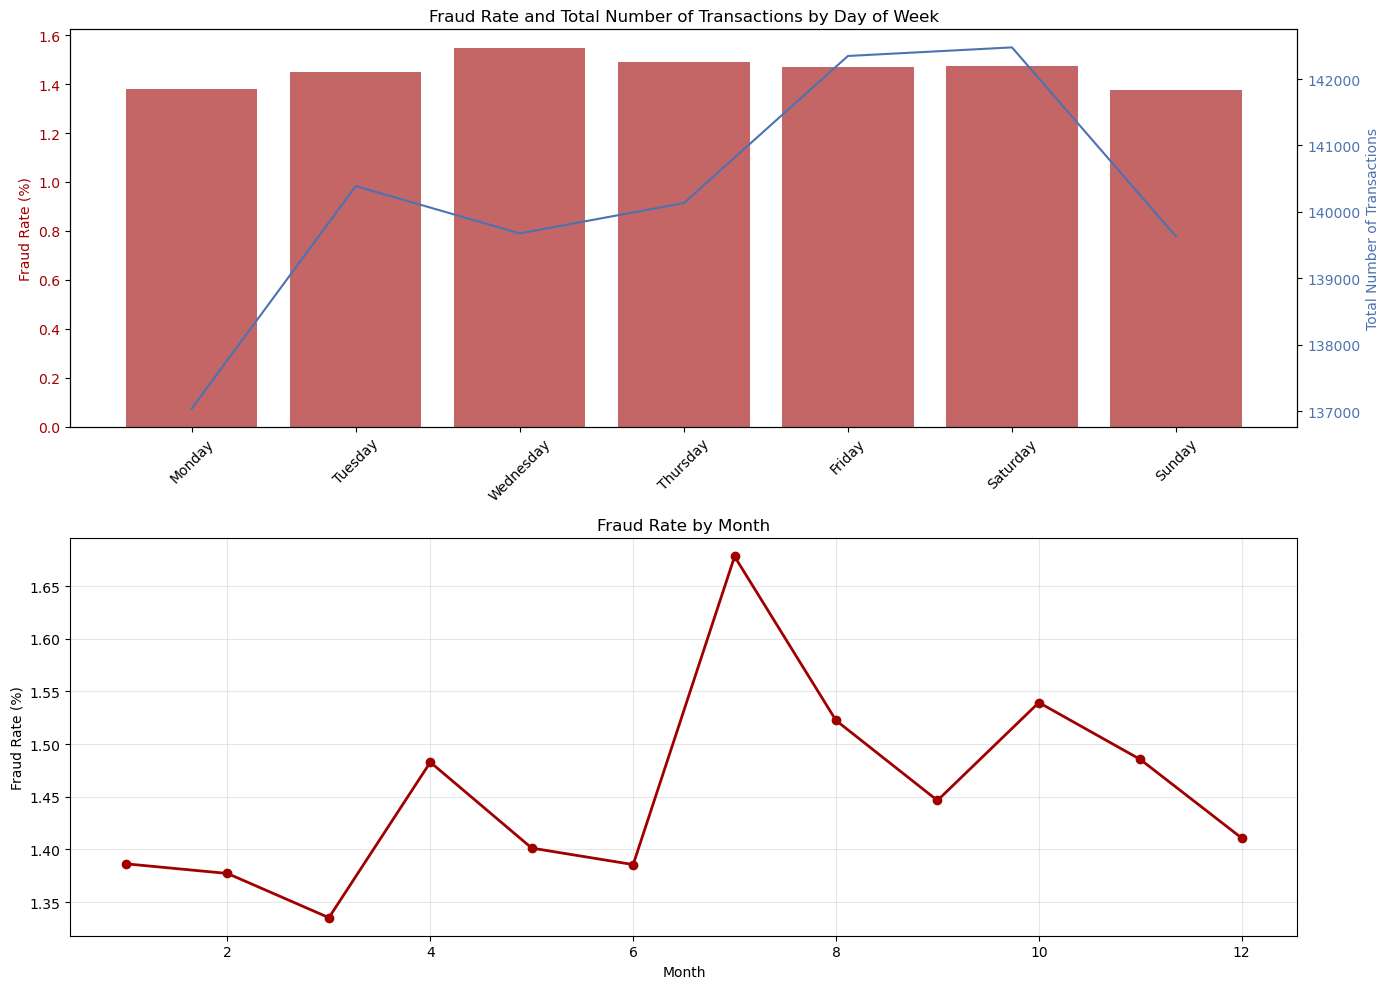


Peak fraud month: 7 (fraud rate: 1.678%)
Lowest fraud month: 3 (fraud rate: 1.335%)


In [22]:
print("TIME ANALYSIS")
print("-" * 40)

# Extract time features

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()

print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Time span: {(df['date'].max() - df['date'].min()).days} days")

# Fraud distribution over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Day of week distribution
dow_fraud = df.groupby('day_name')['fraud_label'].agg(['sum', 'count', 'mean'])
dow_fraud['fraud_rate'] = dow_fraud['mean'] * 100
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_fraud = dow_fraud.reindex(dow_order)

ax1.bar(dow_fraud.index, dow_fraud['fraud_rate'], color='#c46666')

# total transaction by day of week
ax1_twin = ax1.twinx()
ax1_twin.plot(dow_fraud.index, dow_fraud['count'], color='#4C72B0')

ax1.set_title('Fraud Rate and Total Number of Transactions by Day of Week')
ax1.set_ylabel('Fraud Rate (%)', color='#a00000')
ax1_twin.set_ylabel('Total Number of Transactions', color='#4C72B0')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelcolor='#a00000')
ax1_twin.tick_params(axis='y', labelcolor='#4C72B0')


# Fraud rate by month
fraud_rate_by_month = df.groupby('month')['fraud_label'].mean() * 100
ax2.plot(fraud_rate_by_month.index, fraud_rate_by_month.values, 
         color='#a00000', linewidth=2, marker='o')
ax2.set_title('Fraud Rate by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Fraud Rate (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('time_analysis.png', dpi=300, bbox_inches='tight', facecolor='#191414')
plt.show()

# Key findings from time analysis
peak_fraud_month = fraud_rate_by_month.idxmax()
print(f"\nPeak fraud month: {peak_fraud_month} (fraud rate: {fraud_rate_by_month.max():.3f}%)")
print(f"Lowest fraud month: {fraud_rate_by_month.idxmin()} (fraud rate: {fraud_rate_by_month.min():.3f}%)")

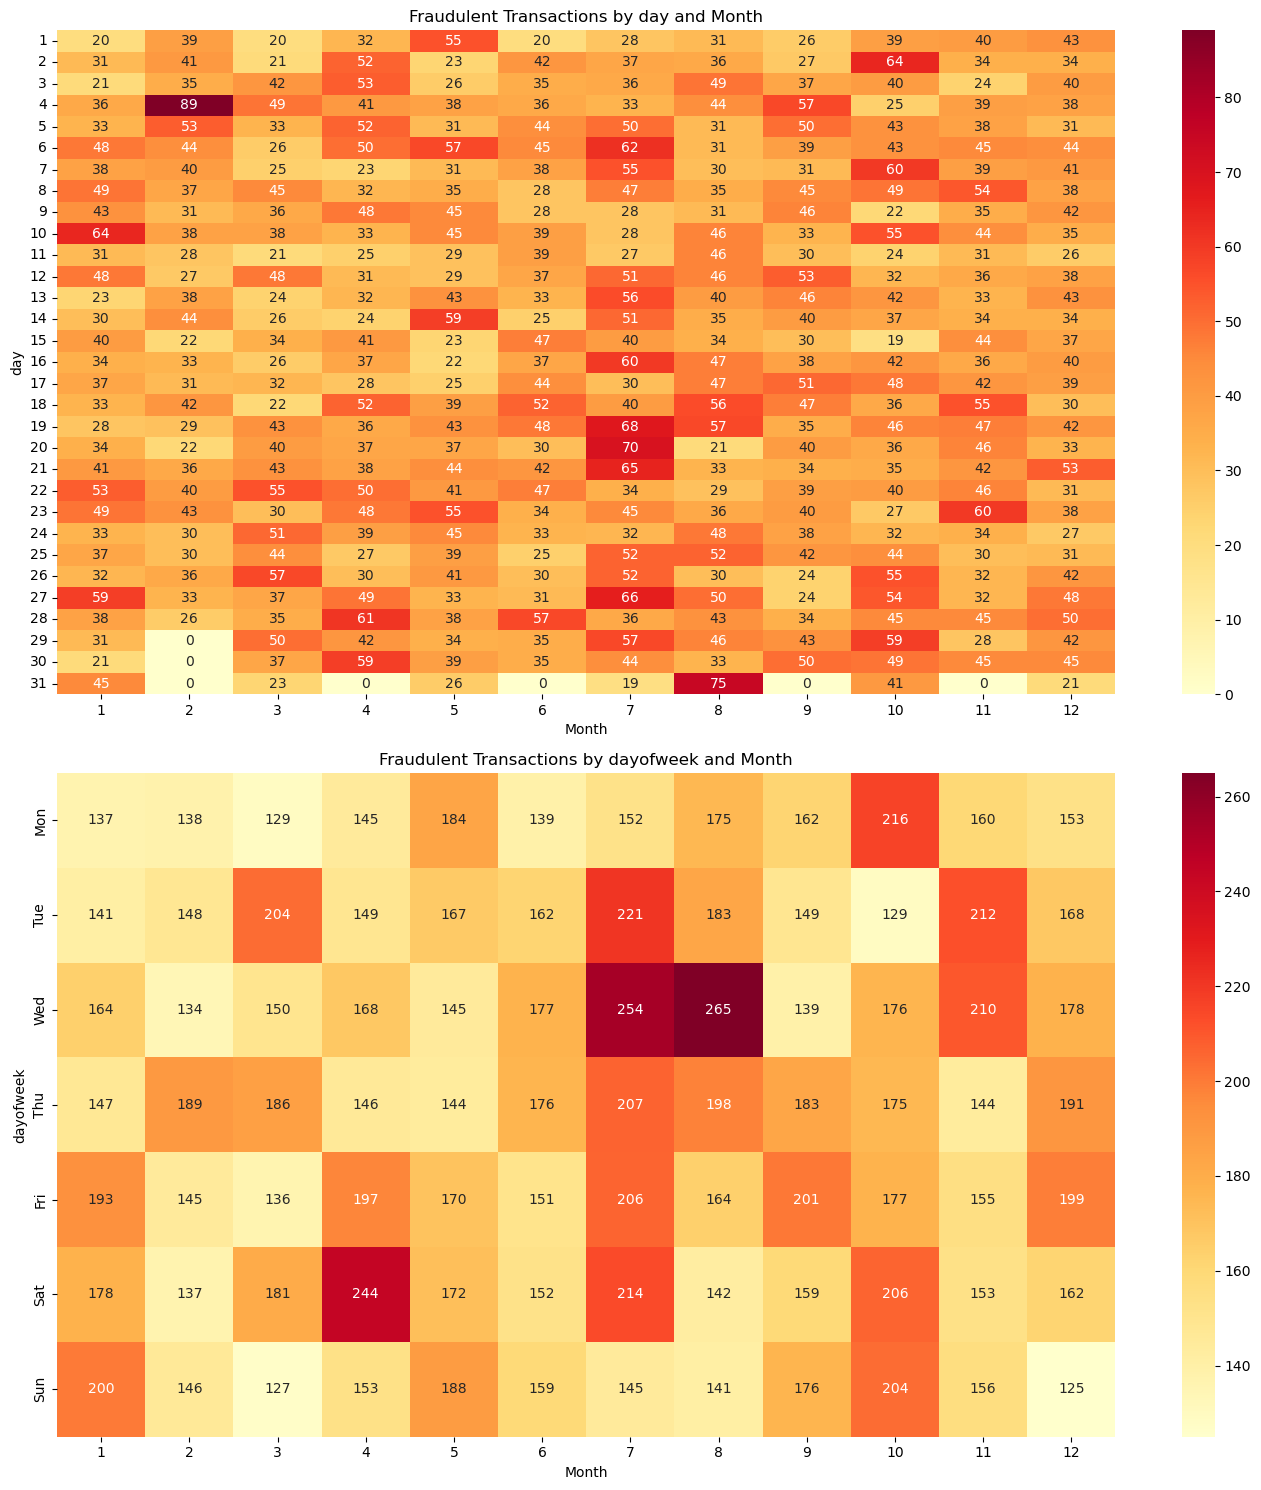

In [23]:
# Group by day of week and month to count frauds
options = ['day', 'dayofweek']
fig, ax = plt.subplots(2, 1, figsize=(14, 15))
for i, option in enumerate(options):
    fraud_time = df[df['fraud_label'] == 1].groupby([option, 'month']).size().unstack(fill_value=0)
    if option == 'dayofweek':
        yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    else:
        yticklabels = list(df.day.unique())
    sns.heatmap(fraud_time, cmap="YlOrRd", annot=True, fmt='d', ax=ax[i],
                yticklabels = yticklabels)
    ax[i].set_title(f"Fraudulent Transactions by {option} and Month")
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel(option)
plt.tight_layout()
plt.show()

ZIP CODE ANALYSIS
----------------------------------------
Top 10 ZIP codes by fraud rate (minimum 10 transactions):
       fraud_count  total_count  fraud_rate
zip5                                       
41310           16           19    0.842105
80626           21           26    0.807692
01961           26           33    0.787879
61604           10           13    0.769231
65421            9           12    0.750000
64578            9           13    0.692308
52700            9           13    0.692308
12318           17           25    0.680000
91610           19           28    0.678571
84346           10           15    0.666667


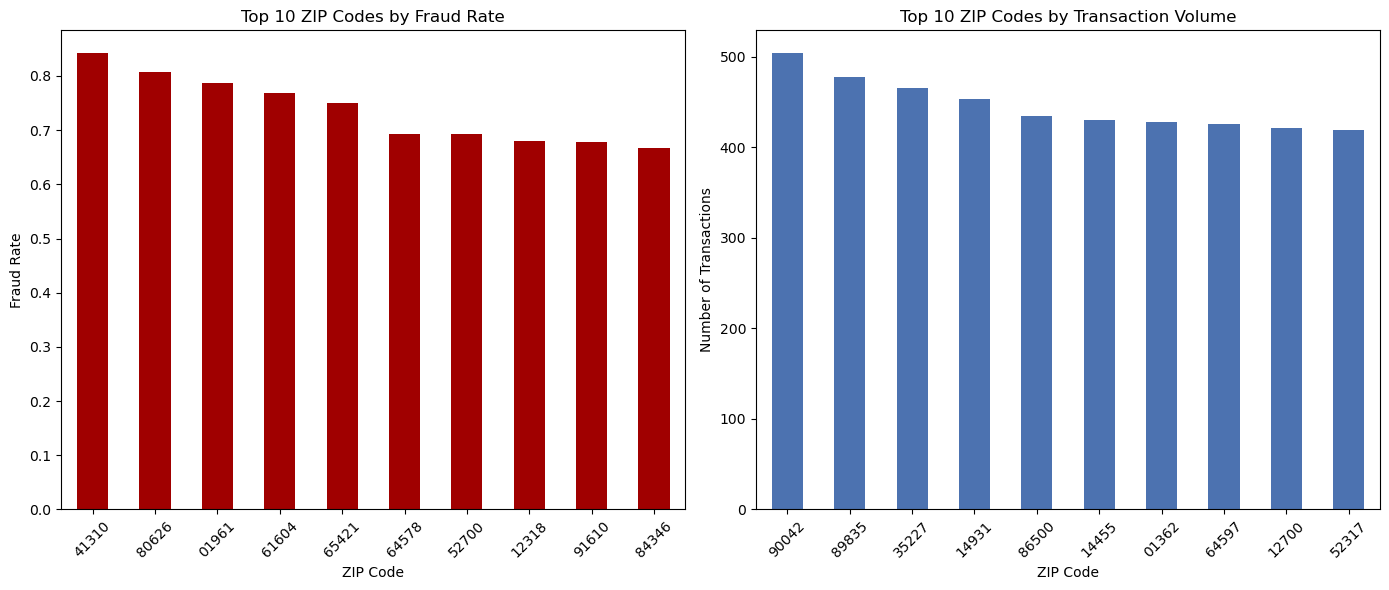

In [24]:
print("ZIP CODE ANALYSIS")
print("-" * 40)

# Analyze zip code patterns
zip_fraud_rate = df.groupby('zip5')['fraud_label'].agg(['sum', 'count', 'mean'])
zip_fraud_rate.columns = ['fraud_count', 'total_count', 'fraud_rate']
zip_fraud_rate = zip_fraud_rate.sort_values('fraud_rate', ascending=False)

print("Top 10 ZIP codes by fraud rate (minimum 10 transactions):")
high_fraud_zips = zip_fraud_rate[zip_fraud_rate['total_count'] >= 10].head(10)
print(high_fraud_zips)

# Visualize ZIP code analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Top fraud ZIP codes color=['#4C72B0', '#a00000']
high_fraud_zips['fraud_rate'].plot(kind='bar', ax=ax1, color='#a00000')
ax1.set_title('Top 10 ZIP Codes by Fraud Rate')
ax1.set_xlabel('ZIP Code')
ax1.set_ylabel('Fraud Rate')
ax1.tick_params(axis='x', rotation=45)

# Transaction volume by ZIP
top_volume_zips = zip_fraud_rate.nlargest(10, 'total_count')
top_volume_zips['total_count'].plot(kind='bar', ax=ax2, color='#4C72B0')
ax2.set_title('Top 10 ZIP Codes by Transaction Volume')
ax2.set_xlabel('ZIP Code')
ax2.set_ylabel('Number of Transactions')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
#plt.savefig('zip_analysis.png', dpi=300, bbox_inches='tight', facecolor='#191414')
plt.show()

# Summary of Insights
1. Application Volume
- ~2,700 daily applications with high volatility
- ~19,000 weekly applications (more stable)
- Notable drops in late March and December

2. Fraud Indicators
- 1.45% overall fraud rate (14,283 of 981,694 transactions)
- Peak fraud in July (1.68%), lowest in March (1.33%)
- No weekend effect on fraud rates

3. Red Flags
- One SSN used 10,000+ times
- Phone "999999999" used ~10,000 times
- Las Vegas addresses heavily concentrated
- Clear synthetic identity fraud patterns

4. Temporal Patterns
- Day 2 of each month shows high fraud
- Mid-month periods (days 14-20) elevated risk
- Summer months (Jun-Aug) have highest fraud activity
- Wednesdays in July-August particularly vulnerable

5. GEOGRAPHIC PATTERNS:
- High fraud ZIP codes identified
- ZIP code 41310 has highest fraud rate
- Geographic clustering may be useful for modeling

6. Recommendations
- Implement real-time duplicate SSN detection
- Block obvious fake phone numbers
- Enhanced monitoring on day 2 of each month
- Increase scrutiny during summer months

Next: Feature Engineering.